In [1]:
import pandas as pd

import numpy as np

In [2]:
data=pd.read_excel('bank.xlsx')

data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Output
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0


In [12]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous,Output
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579,0.115240
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562,0.319347
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


In [5]:
#PCA
from sklearn.preprocessing import StandardScaler


X=data[['age','day','pdays','campaign','previous']]
sc=StandardScaler()

Xscale=sc.fit_transform(X)




from sklearn.decomposition import PCA


pca=PCA(n_components=4,random_state=101)

pca.fit(Xscale)

X_c=pca.transform(Xscale)
X_c

array([[-0.43432277, -0.11722885, -1.12676378, -0.61632735],
       [ 3.64547071,  0.43351788, -0.69561594,  0.0800401 ],
       [ 2.27168374,  0.34903602, -0.55832886, -0.34942066],
       ...,
       [-1.18018493,  1.57916769,  1.8527048 ,  1.5148757 ],
       [ 2.30535795,  0.34064572, -1.13048493,  1.20335007],
       [ 4.35172084,  0.09835002,  0.37125864,  0.91383574]])

In [13]:
input_=data.drop('Output',axis=1)
output_=data['Output']



#training and test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(Xscale,output_,test_size=0.25,random_state=101)

print(x_train.shape)
print(x_test.shape)

(3390, 5)
(1131, 5)


### DecisionTree

In [14]:
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [9]:
#K-bins discretization
from sklearn.preprocessing import KBinsDiscretizer

X=data[['age','day','pdays','campaign','previous']]

disc=KBinsDiscretizer(n_bins=3,encode="ordinal", strategy="uniform")

d=disc.fit_transform(X)


dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)

features=['age','day','pdays','campaign','previous']

data = tree.export_graphviz(dtree, out_file=None, feature_names=features)

graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [15]:
tree = DecisionTreeClassifier()
tree = tree.fit(x_train, y_train)

y_pred=tree.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

con_mat=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['predicted'],margins=True)
from IPython.display import display

display(con_mat)

predicted,0,1,All
Actual,,,
0,900,100,1000
1,101,30,131
All,1001,130,1131


In [16]:
print('accuracy is:',accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))

accuracy is: 0.8222811671087533
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1000
           1       0.23      0.23      0.23       131

    accuracy                           0.82      1131
   macro avg       0.56      0.56      0.56      1131
weighted avg       0.82      0.82      0.82      1131



## Roc curve

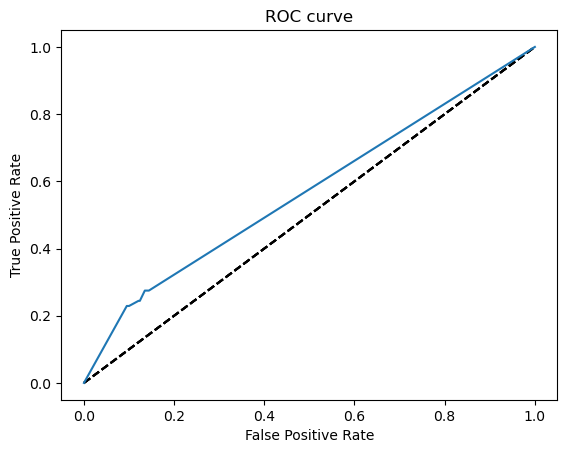

In [21]:
from sklearn.metrics import roc_curve, auc

y_pred_prob_tree = tree.predict_proba(x_test)[:,1]
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

 #Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_tree, tpr_tree, label='Tree (area = %0.3f)' % roc_auc_tree)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.title('ROC curve')
plt.show()